In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Предобработка

#### Обрабатываем plus последовательность

In [2]:
dt = pd.read_csv('Saccaromyces_all_w15_th-1_plus.hits.max.PDS.w50.35.bed', sep='\t', names=['chr', 'first', 'last', '?'])
dt.head()

,chr,first,last,?
0,chrIII,1,489,44.0
1,chrIII,1074,1104,47.0
2,chrIII,50662,50782,38.5
3,chrIII,52882,53002,38.5
4,chrIII,133295,133505,40.1


In [3]:
len(dt)

282

In [4]:
l = []
for i in range(len(dt)):
    l.append(dt['last'][i] - dt['first'][i])
dt['dif'] = l
dt.head()

,chr,first,last,?,dif
0,chrIII,1,489,44.0,488
1,chrIII,1074,1104,47.0,30
2,chrIII,50662,50782,38.5,120
3,chrIII,52882,53002,38.5,120
4,chrIII,133295,133505,40.1,210


Смотрим распределение последовательностей, избавляемся от выбросов.

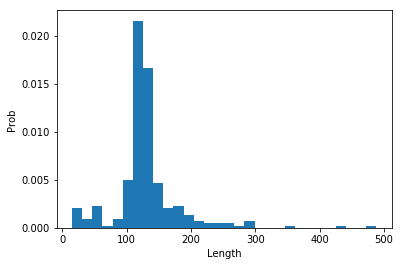

In [5]:
# dt['dif'].hist(bins=len(dt['dif']))
plt.hist(dt['dif'], density=True, bins=30)  # `density=False` would make counts
plt.ylabel('Prob')
plt.xlabel('Length');
plt.show()

In [6]:
print(max(dt['dif']), min(dt['dif']), sum(dt['dif'])/len(dt['dif']))

488 15 132.33333333333334


In [7]:
for i in range(len(dt)):
    if dt['dif'][i] > 270:
        dt = dt.drop(i)
dt = dt.reset_index(drop=True)
for i in range(len(dt)):
    if dt['dif'][i] < 30:
        dt = dt.drop(i)
dt = dt.reset_index(drop=True)

In [8]:
len(dt)

274

In [9]:
l = [1]*len(dt)
dt['count'] = l
dt.groupby(['dif']).sum()

,first,last,?,count
dif,,,,
30,1060352,1060562,309.9,7
45,1510410,1510590,148.3,4
53,3,162,143.5,3
60,3021509,3021929,297.6,7
75,1075804,1075879,35.1,1
83,3,252,151.5,3
90,175585,175675,36.6,1
105,10967902,10970212,845.9,22
120,44615627,44627147,4201.3,96


In [10]:
del dt['dif']
del dt['count']
del dt['?']
l1 = ['reverse']*len(dt)
l2 = [1]*len(dt)
l3 = ['-']*len(dt)
dt['reverse'] = l1
dt['1'] = l2
dt['-'] = l3
dt.head()

,chr,first,last,reverse,1,-
0,chrIII,1074,1104,reverse,1,-
1,chrIII,50662,50782,reverse,1,-
2,chrIII,52882,53002,reverse,1,-
3,chrIII,133295,133505,reverse,1,-
4,chrIII,164340,164460,reverse,1,-


In [11]:
dt.to_csv('chr_plus.bed', sep='\t', index=False, header=False)

#### Обрабатываем minus последовательность

In [12]:
dt = pd.read_csv('Saccaromyces_all_w15_th-1_minus.hits.max.PDS.w50.35.bed', sep='\t', names=['chr', 'first', 'last', '?'])
dt.head()

,chr,first,last,?
0,chrIII,106260,106410,47.5
1,chrIII,316351,316621,45.7
2,chrII,7765,7900,44.1
3,chrII,123841,123976,46.2
4,chrII,128536,128671,50.7


In [13]:
len(dt)

220

In [14]:
l = []
for i in range(len(dt)):
    l.append(dt['last'][i] - dt['first'][i])
dt['dif'] = l
dt.head()

,chr,first,last,?,dif
0,chrIII,106260,106410,47.5,150
1,chrIII,316351,316621,45.7,270
2,chrII,7765,7900,44.1,135
3,chrII,123841,123976,46.2,135
4,chrII,128536,128671,50.7,135


Смотрим распределение последовательностей, избавляемся от выбросов.

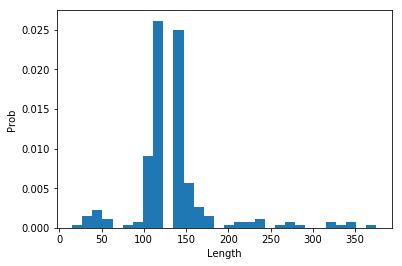

In [15]:
# dt['dif'].hist(bins=len(dt['dif']))
plt.hist(dt['dif'], density=True, bins=30)  # `density=False` would make counts
plt.ylabel('Prob')
plt.xlabel('Length');
plt.show()

In [16]:
print(max(dt['dif']), min(dt['dif']), sum(dt['dif'])/len(dt['dif']))

375 15 134.38636363636363


In [17]:
for i in range(len(dt)):
    if dt['dif'][i] > 240:
        dt = dt.drop(i)
dt = dt.reset_index(drop=True)
for i in range(len(dt)):
    if dt['dif'][i] < 30:
        dt = dt.drop(i)
dt = dt.reset_index(drop=True)
dt.head()

,chr,first,last,?,dif
0,chrIII,106260,106410,47.5,150
1,chrII,7765,7900,44.1,135
2,chrII,123841,123976,46.2,135
3,chrII,128536,128671,50.7,135
4,chrII,130576,130681,38.5,105


In [18]:
len(dt)

209

In [19]:
l = [1]*len(dt)
dt['count'] = l
dt.groupby(['dif']).sum()

,first,last,?,count
dif,,,,
30,1623020,1623140,190.9,4
45,4040071,4040341,271.2,6
60,2940891,2941071,132.9,3
75,82324,82399,39.7,1
90,1241001,1241181,73.8,2
105,10460310,10462830,924.4,24
120,34233549,34241829,2982.0,69
135,27035284,27044194,3258.8,66
150,7416869,7419119,755.5,15


In [20]:
del dt['dif']
del dt['count']

In [21]:
dt.to_csv('chr_minus.bed', sep='\t', index=False, header=False)

Создаем train/test наборы